In [1]:
import numpy as np
import cv2
import pydicom as dicom
import matplotlib.pyplot as plt
%matplotlib inline



In [20]:
ds=dicom.dcmread('image_63 CT p11.dcm')
dcm_sample=ds.pixel_array*128
dcm_sample.dtype

dtype('int16')

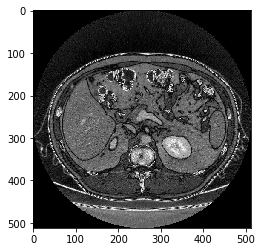

In [26]:
img = cv2.convertScaleAbs(dcm_sample, alpha=(255.0/65535.0))
plt.imshow(img,cmap='gray')

In [27]:
img.dtype

dtype('uint8')

In [28]:
image, contours, heirarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [29]:
heirarchy


array([[[  -1,   -1,    1,   -1],
        [   2,   -1,   -1,    0],
        [   3,    1,   -1,    0],
        ...,
        [1540, 1538,   -1,    0],
        [1541, 1539,   -1,    0],
        [  -1, 1540,   -1,    0]]], dtype=int32)

In [30]:
external_contour = np.zeros(image.shape)

In [31]:
for i in range(len(contours)):
    if heirarchy[0][i][3] == -1 :
        cv2.drawContours(external_contour,contours,i,255,-1)

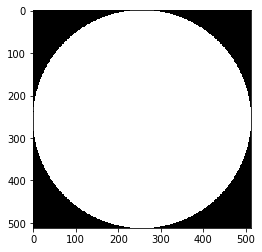

In [32]:
plt.imshow(external_contour,cmap='gray')

In [41]:
internal_contour = np.zeros(image.shape)

In [42]:
for i in range(len(contours)):
    if heirarchy[0][i][3] != 0 and heirarchy[0][i][3] != -1:
        cv2.drawContours(internal_contour,contours,i,255,-1)

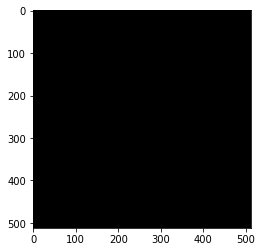

In [43]:
plt.imshow(internal_contour,cmap='gray')